Proyecto 1 BI - Analítica de Textos
* Estudiante 1: Juan Diego Sarmiento Sánchez - 202121484
* Estudiante 2:
* Estudiante 3: Germán Alberto Rojas Cetina - 202013415

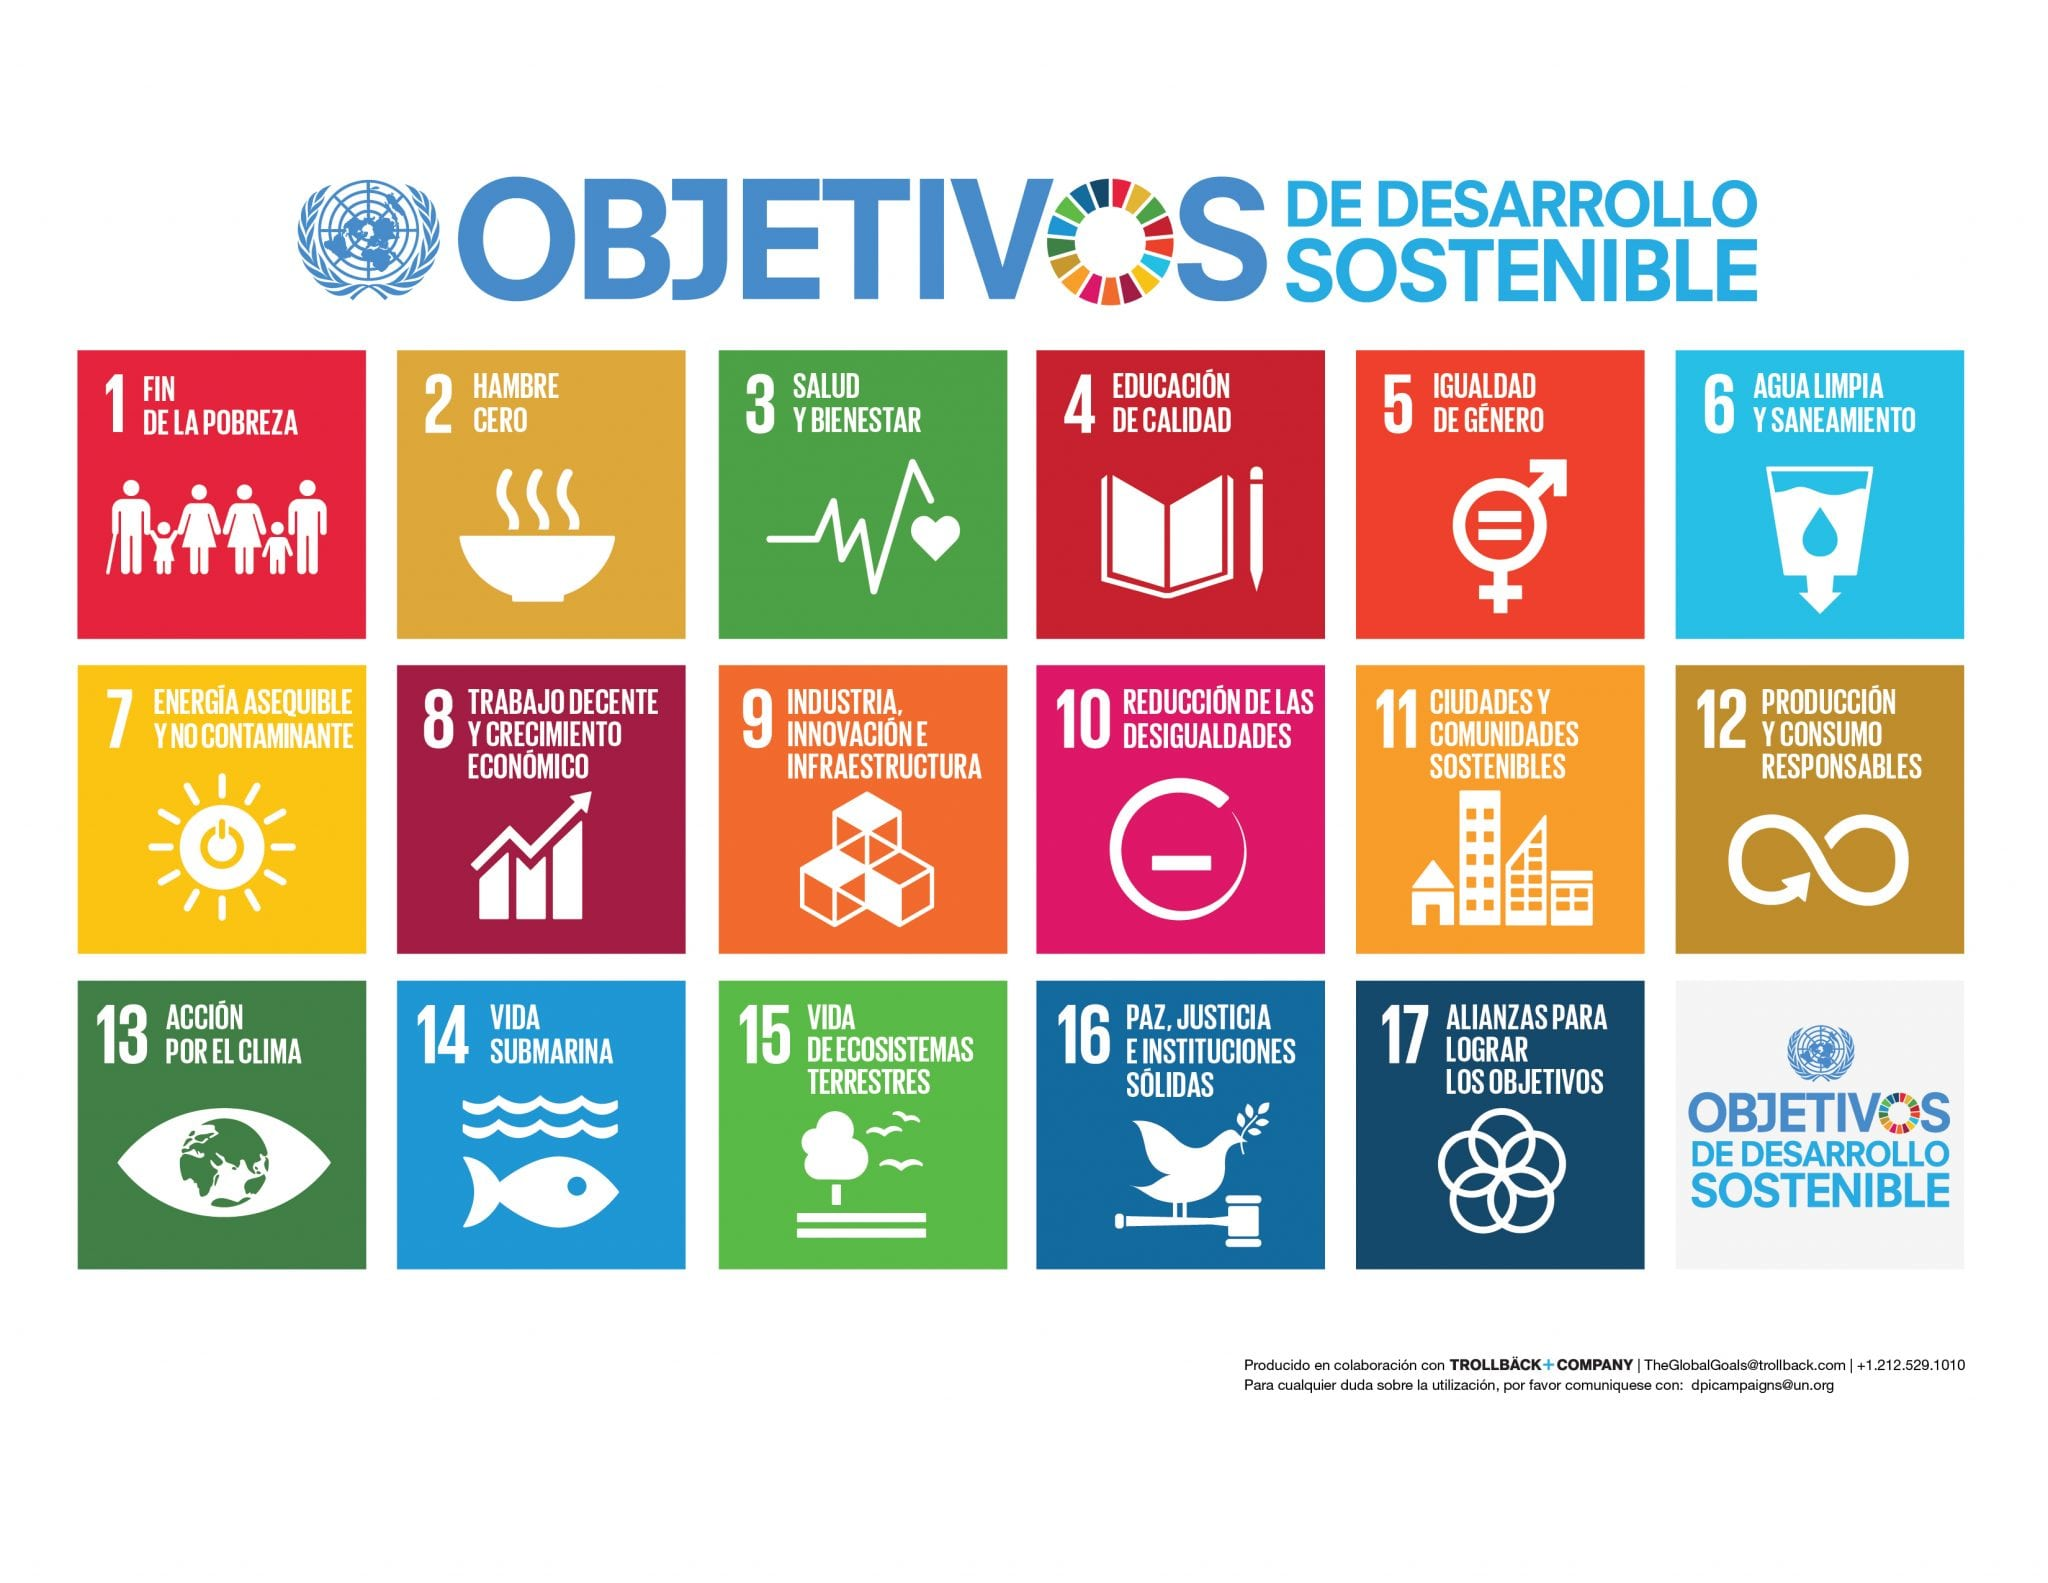

Para este proyecto abordaremos los siguientes objetivos:
- (3) Salud y Bienestar
- (4) Educación de calidad
- (5) Igualdad de género

# Etapa 1

## Objetivos

- Aplicar la metodología de analítica de textos para la construcción de soluciones de analítica alineadas con los objetivos de organizaciones en un contexto de aplicación.

## Problema
<p style="text-align: justify;"> Desarrollar un modelo de clasificación, con técnicas de aprendizaje automático, que permita relacionar de manera automática un texto según los ODS. Al igual que desarrollar una aplicación que facilite la interacción con el resultado de dicho modelo.

# 1. Instalación e importación de librerías

In [ ]:
import nltk
import pandas as pd

nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)

pd.options.mode.chained_assignment = None

In [ ]:
!pip install chardet

In [ ]:
!pip install ftfy

In [ ]:
!pip install openpyxl

In [ ]:
!pip install unidecode

In [ ]:
!pip install langdetect

In [ ]:
!pip install pandas-profiling

In [ ]:
!pip install pydantic-settings

In [ ]:
# Maneja contracciones que se presentan en el inglés
!pip install contractions

In [ ]:
# Librería Natural Language Toolkit
import nltk

# Permite separar un texto en frases
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Descargamos el paquete de WordNetLemmatize para encontrar lemas de cada palabra
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Instalación de librerias
import pandas as pd
import numpy as np
import sys
#from pandas_profiling import ProfileReport
from unidecode import unidecode

import chardet

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
import nltk
from nltk.corpus import wordnet
from nltk.stem import PorterStemmer
nltk.download('wordnet')


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.base import BaseEstimator, ClassifierMixin
from nltk.tokenize import word_tokenize
from sklearn.metrics import (
    ConfusionMatrixDisplay, RocCurveDisplay,
    roc_auc_score, precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.pipeline import Pipeline

import matplotlib.pyplot as plt

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Configuramos pandas para mostrar el contenido de todas las celdas
pd.set_option('display.max_colwidth', None)

Obtenemos una lista de stopwords en español con el objetivo de usarla para eliminar palabras comunes ya que no aportan información relevante en NLP

In [ ]:
stop_words = stopwords.words('spanish')

In [ ]:
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

# 2. Perfilamiento y entendimiento de los datos

Leemos el CSV que contiene los datos

In [ ]:
df = pd.read_excel('./content/ODScat_345.xlsx')

In [ ]:
df.shape

(4049, 2)

In [ ]:
df.sample(5)

,Textos_espanol,sdg
3747,"Los programas de apoyo también pueden adaptarse a las limitaciones de tiempo de las mujeres. Por ejemplo, el aprendizaje a distancia puede brindar a las mujeres un mayor acceso a la capacitación, ya que los cursos se pueden realizar en horarios adecuados a sus horarios. Las iniciativas políticas en las áreas de campañas de información, capacitación y reducción de la carga del cuidado ofrecen un doble dividendo potencial: mayor empoderamiento de las mujeres y empresas más productivas.",5
2911,"Por el contrario, dada la estabilidad de los hombres en cuanto a tasas de empleo, el impacto del empleo masculino a nivel de los hogares fue globalmente neutro (Anexo 5.A3, Figura 5.A3.1). Por ejemplo, en los países nórdicos la parte total de las transferencias sociales representa cerca del 20% de los ingresos de los hogares (25% en Suecia), mientras que en Australia y Estados Unidos constituye el 8% y el 7%, respectivamente. Las contribuciones respectivas de los ingresos y otras fuentes de ingresos a la desigualdad general pueden estimarse (véase OCDE, 2011), y es interesante considerar en qué medida pueden estimarse las contribuciones de los componentes de los ingresos específicos de cada género.",5
595,"Las proyecciones actuariales permiten predecir la evolución probable de la población y, por tanto, el número futuro de individuos incluidos en cada celda del modelo. El gasto sanitario futuro se determina multiplicando los costes medios por el número previsto de individuos incluidos en cada celda. Los modelos basados en cohortes más avanzados tienen en cuenta las tendencias de las discapacidades, así como los factores que influyen en las tendencias epidemiológicas, como el comportamiento individual y la exposición a factores de riesgo (por ejemplo, tabaquismo, obesidad, hipertensión y colesterol).",3
277,"La elasticidad del gasto en salud al PIB es de 0,8. La evolución de los precios y la tecnología sanitaria es un factor determinante importante del crecimiento del gasto sanitario. De la Maisonneuve y Oliveira Martins (2013) muestran que para los países de la OCDE explican alrededor del 50 % de la variación del gasto público en salud desde la década de 1990 hasta finales de la década de 2000 y el 40 % para los países BRIICS.",3
1602,"Los desajustes tienen sobre todo una dimensión de habilidades, con un exceso de trabajadores poco calificados y una posible falta de trabajadores calificados en ciertos dominios. Reducir la cuña fiscal elevada sobre los salarios bajos y evitar aumentos excesivos del salario mínimo apoyaría la demanda de mano de obra poco cualificada. A más largo plazo, mejorar la oferta laboral requiere mejorar los resultados educativos, especialmente de los estudiantes desfavorecidos, y hacer que la transición de la escuela al trabajo sea menos abrupta.",4


Identificamos en qué idiomas se encuentran los textos. Para esto, se agrega de manera momentánea que indica el idioma de la reseña.

In [ ]:
from langdetect import detect
df['idioma'] = df['Textos_espanol'].apply(detect)

Podemos apreciar que hay un porcentaje reducido de textos en inglés y francés, estas filas serán eliminadas ya que son insignificantes

In [ ]:
df['idioma'].value_counts(dropna=False, normalize=True)

,proportion
idioma,
es,0.996542
en,0.001976
fr,0.001482


Verificamos valores nulos en el DataFrame

In [ ]:
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

,0
Textos_espanol,0.0
sdg,0.0
idioma,0.0


Verificamos valores duplicados en el Dataframe

In [ ]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de filas duplicadas: {num_duplicados}")

Número de filas duplicadas: 0


## 2.1 Limpieza de datos

Se eliminan los textos en inglés y francés:

In [ ]:
df = df.drop(df[df['idioma'] == 'en'].index)
df = df.drop(df[df['idioma'] == 'fr'].index)

In [ ]:
df.sample(5)

,Textos_espanol,sdg,idioma
272,"Si bien la mayoría de los países no tienen límites para el registro de la mortalidad, algunos países imponen un límite más bajo en la edad gestacional y/o el umbral de peso para que una muerte se cuente como “muerte después de nacido vivo”. Este límite es más alto para la Federación Rusa (28 semanas) que para otros países (ver OCDE, 2009). Los resultados parecen estar en forma de intervalos de confianza. Las tasas de mortalidad más bajas alcanzaron a los grupos más problemáticos (de 25 a 39 años) en último lugar.",3,es
536,"El segundo Programa Nacional de Acción Ambiental 2012-2016 (NEAP-2) subraya el impacto de la degradación ambiental en la salud, pero no se brindan acciones específicas para comprender mejor el impacto en la salud. El objetivo principal del plan de acción y el programa gubernamental es la promoción de la calidad de la salud en la población georgiana mediante la reducción del consumo de tabaco y la protección de la población contra el tabaquismo pasivo. El NCDCPH desarrolla estándares y lineamientos nacionales, promueve la mejora de la salud pública, participa en el desarrollo de políticas de salud pública, lleva a cabo la vigilancia epidemiológica, el programa de inmunización, diagnóstico de laboratorio y actividades de vigilancia, responde a emergencias de salud pública y produce estadísticas de salud.",3,es
2234,"Los paquetes de estímulo estaban sesgados a favor del sector financiero, causante de la crisis en primer lugar. En la prÃ¡ctica, los paquetes de estÃmulo mostraron poca o ninguna sensibilidad de gÃ©nero. De hecho, los principales componentes de los distintos paquetes de estímulo parecen seguir reflejando ""estereotipos de género"" en la formulación de políticas.",5,es
3318,"Aunque India cuenta con un sistema nacional de asistencia sanitaria que concede consultas gratuitas en los hospitales públicos, éstos suelen tener largas listas de espera, carecen de personal suficiente y a menudo no pueden satisfacer la creciente demanda de medicamentos. Como consecuencia, la cobertura sanitaria efectiva es baja, pues sólo cubre al 10% de la población, y únicamente el gobierno o los empleados de grandes empresas disfrutan de un seguro médico completo (Kumar et al., La sanidad privada ha colmado parcialmente el vacío dejado por la escasa oferta del sector público.",3,es
2827,"La viuda recibirá la octava parte de los bienes de su difunto marido o la cuarta parte si no tiene hijos. Por ejemplo, no es raro que la familia presione a las herederas para que renuncien a todos sus derechos de herencia en favor de los parientes varones. Muchas mujeres no saben que pueden negarse a ceder sus derechos o pueden apelar ante los tribunales.",5,es


Se elimina la columna 'idioma'

In [ ]:
df = df.drop('idioma', axis=1)

In [ ]:
df.head()

,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

### Distribución de valores en la columna *sdg*

In [ ]:
df['sdg'].value_counts(dropna=False,normalize=True)

,proportion
sdg,
5,0.358116
4,0.335068
3,0.306815


Observamos que tenemos una distribución equitativa de los datos para los tres ODS

In [ ]:
df['Textos_espanol'] = df['Textos_espanol'].astype(str)

### Corregimos palabras mal codificadas

In [ ]:
import ftfy

def corregir_texto(texto):
  texto = ftfy.fix_text(texto)
  return texto

def corregir_manual(texto):
    if isinstance(texto, str):
        # Reemplazos para letras con tildes
        texto = texto.replace('Ã¡', 'á')  # á
        texto = texto.replace('Ã©', 'é')  # é
        texto = texto.replace('Ã­', 'í')  # í
        texto = texto.replace('Ã³', 'ó')  # ó
        texto = texto.replace('Ãº', 'ú')  # ú
        texto = texto.replace('Ã', 'Á')  # Á
        texto = texto.replace('Ã‰', 'É')  # É
        texto = texto.replace('Ã', 'Í')  # Í
        texto = texto.replace('Ã“', 'Ó')  # Ó
        texto = texto.replace('Ãš', 'Ú')  # Ú

        # Reemplazos para la ñ y Ñ
        texto = texto.replace('Ã±', 'ñ')  # ñ
        texto = texto.replace('Ã‘', 'Ñ')  # Ñ

        # Reemplazos para símbolos de comillas y otros
        texto = texto.replace('â€œ', '“')  # Comillas de apertura
        texto = texto.replace('â€', '”')  # Comillas de cierre
        texto = texto.replace('â€˜', '‘')  # Comilla simple apertura
        texto = texto.replace('â€™', '’')  # Comilla simple cierre
        texto = texto.replace('â€“', '–')  # Guion largo
        texto = texto.replace('â€¦', '…')  # Puntos suspensivos

        # Reemplazos para caracteres especiales
        texto = texto.replace('Â¿', '¿')  # ¿
        texto = texto.replace('Â¡', '¡')  # ¡
        texto = texto.replace('Â', '')    # Espacio no deseado (precede algunos caracteres)

        # Otros reemplazos posibles
        texto = texto.replace('â€œ', '"')  # Comillas dobles
        texto = texto.replace('â€', '"')   # Comillas dobles
        texto = texto.replace('â€™', "'")  # Comilla simple
        texto = texto.replace('â€“', '-')  # Guion largo
        texto = texto.replace('â€¦', '...')  # Puntos suspensivos

    return texto
# Aplicamos la función al DF
df['Textos_espanol'] = df['Textos_espanol'].apply(corregir_texto)
df['Textos_espanol'] = df['Textos_espanol'].apply(corregir_manual)


In [ ]:
#df = df.applymap(corregir_manual)

In [ ]:
df.sample(5)

,Textos_espanol,sdg
2091,"El proyecto Women Village Incubators administrado por el Fondo para el Desarrollo de Siria a través de FIRDOS, el proyecto ""Food for Thought"" lanzado por el Microfund for Women en Jordania, y los proyectos entregados bajo las estrategias nacionales yemeníes para el desarrollo de las mujeres en áreas rurales son buenos ejemplos de esto. Además, en Yemen, el Servicio de Promoción de Pequeñas y Microempresas (SMEPS, por sus siglas en inglés) trabajó con la IFC para brindar capacitación sobre ""Las mujeres obtienen la ventaja empresarial"". Este Fondo ofrece capacitación integrada y apoyo técnico a mujeres emprendedoras para que puedan desarrollar pequeñas empresas artesanales y de servicios innovadoras.",5
1036,"Estipula: /) desarrollar un marco general de cualificaciones para el Espacio Europeo de Educación Superior, en particular titulaciones comparables organizadas en una estructura de tres ciclos y una definición común de los resultados del aprendizaje en esta estructura de tres ciclos, ii) un sistema común de garantía de calidad, iii) el reconocimiento de títulos extranjeros y otras cualificaciones de educación superior. Los estudios de postgrado conducen a los títulos de Specializacija (uno o dos años después de la obtención del título de grado en el sistema pre-Bolonia y no existe en el nuevo sistema), Magisterij (equivalente al título de Master of Science en el sistema pre-Bolonia y obtenido después de uno o dos años en el nuevo sistema) y Doktorat (Doctor en Ciencias). Existen tres vías principales para la formación continua. En primer lugar, para los adultos que no completaron o no completaron la educación secundaria superior, es posible continuar los cursos de preparación profesional y Matura, lo que les permite obtener certificados de educación secundaria superior.",4
2455,"Además, en muchos países la definición de violencia doméstica en los sistemas nacionales de justicia penal sigue siendo ambigua, como en Timor Oriental y Camboya (Capítulo 4). Dado que la violencia y el acoso domésticos y sexuales tienden a proliferar inmediatamente después de los conflictos armados, las mujeres son victimizadas aún más en un momento que ya es particularmente difícil. En algunos casos, se pueden reconstruir los peores aspectos de las normas culturales dominadas por los hombres, como la poligamia, los matrimonios concertados a temprana edad y la segregación.",5
2349,"Un análisis de género permite a los donantes abordar las lagunas u oportunidades que repercuten en la capacidad de los hombres/niños y las mujeres/niñas para beneficiarse equitativamente del programa o la política. Cuando los análisis más amplios de la economía política y los conflictos incorporan la perspectiva de género, pueden aportar valiosas perspectivas sobre la interacción entre las relaciones de género y los procesos de construcción del Estado en un contexto determinado y pueden poner de relieve oportunidades para desarrollar una programación más equitativa, específica y eficaz. Los enfoques de igualdad de género deben utilizar, y a menudo utilizan, el análisis de género como medio para formular estrategias que beneficien a hombres y mujeres.",5
3560,"El NHIF recortó los precios pagados a los proveedores pero, en general, protegió los gastos de atención primaria. En general, hay poca deuda acumulada en el sistema. De hecho, Lituania ha reducido considerablemente su sector de camas de hospital desde la década de 1990, aunque no tan drásticamente como sus vecinos bálticos, y todavía tiene la segunda proporción más alta de camas de cuidados curativos por población en la UE. En años más recientes, la reducción se centró principalmente en fusiones de hospitales como entidades legales sin cambiar la infraestructura real.",3


### Eliminamos caracteres especiales y puntuación

In [ ]:
import re
import unicodedata
import inflect
from nltk.corpus import stopwords

stopwords_espaniol = set(stopwords.words('spanish'))

def eliminar_no_ascii(palabras):
  nuevas_palabras = []
  for palabra in palabras:
    nueva_palabra = unicodedata.normalize('NFKD', palabra).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    nuevas_palabras.append(nueva_palabra)
  return nuevas_palabras

def a_minusculas(palabras):
  nuevas_palabras = [palabra.lower() for palabra in palabras]
  return nuevas_palabras

def remover_puntuacion(palabras):
  nuevas_palabras = []
  for palabra in palabras:
    nueva_palabra = re.sub(r'[^\w\s]', '', palabra)
    if nueva_palabra != '':
      nuevas_palabras.append(nueva_palabra)
  return nuevas_palabras

def reemplazar_numeros(palabras):
  p = inflect.engine()
  nuevas_palabras = []
  for palabra in palabras:
    if palabra.isdigit():
      nuevas_palabras.append(p.number_to_words(palabra))
    else:
      nuevas_palabras.append(palabra)
  return nuevas_palabras

def eliminar_stopwords(palabras):
  nuevas_palabras = []
  for palabra in palabras:
    if palabra not in stopwords_espaniol:
      nuevas_palabras.append(palabra)
  return nuevas_palabras

def procesamiento(palabras):
  palabras = eliminar_no_ascii(palabras)
  palabras = a_minusculas(palabras)
  palabras = remover_puntuacion(palabras)
  palabras = reemplazar_numeros(palabras)
  palabras = eliminar_stopwords(palabras)
  return palabras

### Tokenizacion

In [ ]:
# Corregimos contracciones
df['Textos_espanol'] = df['Textos_espanol'].apply(contractions.fix)

In [ ]:
# Eliminamos ruido
df['words'] = df['Textos_espanol'].apply(word_tokenize).apply(procesamiento)
df.head()

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consultas, externas, especialistas, three hundred and nineteen, cada, mil, derechohabientes, sp, comparacion, three hundred and thirty-eight, six hundred and twenty, cada, mil, derechohabientes, imss, issste, respectivamente, si, bien, diferencias, pueden, reflejar, necesidad, desigual, poblacion, ligeramente, mayor, issste, pueden, justificarse, manera, numero, recetas, pudieron, ser, surtidas, totalidad, farmaceutico, debido, falta, existencias, thirty-three, dentro, sp, comparacion, fourteen, dentro, imss, segun, datos, encuesta, aunque, propias, cifras, institutos, ss, sugieren, tasas, mas, altas, recetas, surtidas, ambas, cifras, encuentran, mas, altas, ocde, gasto, bolsillo, reducido, significativamente, ultima, decada, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, traves, reforma, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, central, financio, directamente, solo, three, gasto, total, salud, realizo, transferencias, especificas, gasto, salud, ascendieron, fifty-six, gasto, total, mayor, parte, gasto, presupuestario, salud, realizan, gobiernos, condados, condados, pobres, solo, pueden, ofrecer, bajo, nivel, atencion, poblacion, local, gobierno, provincial, proporciona, subsidios, lado, oferta, hospitales]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[claramente, factores, juego, particular, variedad, barreras, determinantes

### Normalización del texto

In [ ]:
stemmer = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

def obtener_raices(palabras):
  raices = [stemmer.stem(palabra) for palabra in palabras]
  return raices

def lematizar_verbos(palabras):
    # Lematizar los verbos
    lemas = []
    for palabra in palabras:
          lema = lemmatizer.lemmatize(palabra)
          lemas.append(lema)
    return lemas

def raices_y_lemas(palabras):
    raices = obtener_raices(palabras)
    lemas = lematizar_verbos(raices)
    return lemas

In [ ]:
# Verificamos la correción
df['words'] = df['words'].apply(raices_y_lemas)
df.head(5)

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,"[ejemplo, numero, consulta, externa, especialista, three hundred and nineteen, cad, mil, derechohaby, sp, comparac, three hundred and thirty-eight, six hundred and twenty, cad, mil, derechohaby, imss, issst, respectiva, si, bien, diferencia, pued, reflej, necesidad, desig, poblac, ligera, may, issst, pued, justificars, maner, numero, receta, pudieron, ser, surtida, totalidad, farmaceutico, debido, falt, existencia, thirty-three, dentro, sp, comparac, fourteen, dentro, imss, segun, dato, encuest, aunqu, propia, cifra, instituto, s, sugy, tasa, ma, alta, receta, surtida, amba, cifra, encu, ma, alta, ocd, gasto, bolsillo, reducido, significativa, ultim, decad, pe, esfuerzo, logr, cobertur, sanitar, univers, trav, reform, sp]"
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,"[two thousand and seven, gobierno, cent, financio, directa, solo, three, gasto, tot, salud, realizo, transferencia, especifica, gasto, salud, ascendieron, fifty-six, gasto, tot, may, part, gasto, presupuestario, salud, real, gobierno, condado, condado, pobr, solo, pued, ofrec, bajo, nivel, at, poblac, loc, gobierno, provint, proporcion, subsidio, lado, ofert, hospit]"
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,"[clara, fact, juego, particul, variedad, barrera, determin, soc, pued, relacionado, genero, clas, etn, cast, idiom, relig, surg, estructura, norma, proceso, soc, arraigado, aceiv, incluso, fom, distribuc, injusta, riquez, recurs

Analizamos las palabras identificadas para relacionar las opiniones con los ODS y posibles estrategias que la organización debe plantear.

In [ ]:
# Combinamos todas las palabras en un solo conjunto para análisis general
todas_palabras = [palabra for lista_palabras in df['words'] for palabra in lista_palabras]

# Creamos un conteo de las palabras más frecuentes
from collections import Counter
contador_palabras = Counter(todas_palabras)

# Vemos las 20 palabras más frecuentes en todo el conjunto de datos
palabras_mas_frecuentes = contador_palabras.most_common(20)

In [ ]:
palabras_mas_frecuentes

[('muj', 3333),
 ('ma', 2807),
 ('salud', 1676),
 ('genero', 1651),
 ('pued', 1620),
 ('educac', 1503),
 ('pais', 1406),
 ('at', 1338),
 ('tamby', 1295),
 ('ano', 1054),
 ('nivel', 1052),
 ('estudy', 1015),
 ('servicio', 1006),
 ('ocd', 977),
 ('profes', 971),
 ('hombr', 866),
 ('deb', 844),
 ('may', 836),
 ('nac', 825),
 ('resultado', 786)]

Relacionamos las palabras con el ODS específico

In [ ]:
# Filtrar las palabras relacionadas con el ODS 3
palabras_ods_3 = [palabra for lista_palabras in df[df['sdg'] == 3]['words'] for palabra in lista_palabras]

# Contar las palabras más comunes para este ODS
contador_palabras_ods_3 = Counter(palabras_ods_3)

In [ ]:
contador_palabras_ods_3.most_common(20)

[('salud', 1521),
 ('at', 1172),
 ('ma', 906),
 ('servicio', 683),
 ('pais', 475),
 ('pacy', 470),
 ('ment', 416),
 ('tamby', 401),
 ('pued', 395),
 ('enfermedad', 393),
 ('ano', 390),
 ('medico', 375),
 ('calidad', 333),
 ('primar', 330),
 ('sistem', 324),
 ('nac', 321),
 ('persona', 308),
 ('ocd', 302),
 ('may', 300),
 ('nivel', 291)]

In [ ]:
# Filtrar las palabras relacionadas con el ODS 4
palabras_ods_4 = [palabra for lista_palabras in df[df['sdg'] == 4]['words'] for palabra in lista_palabras]

# Contar las palabras más comunes para este ODS
contador_palabras_ods_4 = Counter(palabras_ods_4)

In [ ]:
contador_palabras_ods_4.most_common(20)

[('educac', 1202),
 ('estudy', 976),
 ('ma', 910),
 ('profes', 766),
 ('escuela', 716),
 ('doc', 610),
 ('escol', 578),
 ('pued', 548),
 ('aprendizas', 527),
 ('evaluac', 516),
 ('nivel', 465),
 ('ocd', 444),
 ('ano', 432),
 ('alumno', 430),
 ('pais', 417),
 ('tamby', 403),
 ('escuel', 401),
 ('supery', 367),
 ('desarrollo', 357),
 ('resultado', 346)]

In [ ]:
# Filtrar las palabras relacionadas con el ODS 5
palabras_ods_5 = [palabra for lista_palabras in df[df['sdg'] == 5]['words'] for palabra in lista_palabras]

# Contar las palabras más comunes para este ODS
contador_palabras_ods_5 = Counter(palabras_ods_5)

In [ ]:
contador_palabras_ods_5.most_common(20)

[('muj', 3160),
 ('genero', 1618),
 ('ma', 991),
 ('hombr', 765),
 ('pued', 677),
 ('igualdad', 560),
 ('trabajo', 536),
 ('derecho', 526),
 ('pais', 514),
 ('tamby', 491),
 ('soc', 402),
 ('lab', 356),
 ('violenc', 344),
 ('politica', 341),
 ('participac', 319),
 ('may', 314),
 ('tiempo', 297),
 ('nivel', 296),
 ('ejemplo', 290),
 ('est', 279)]

Visualización en nube de palabras

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

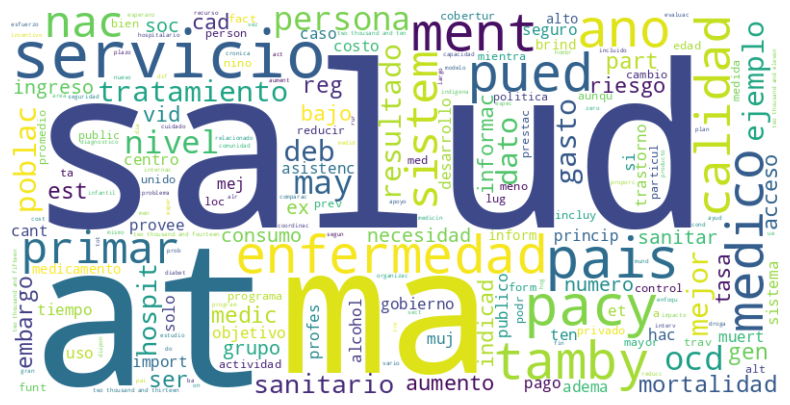

In [ ]:
# Generamos nube de palabras para ODS 3
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contador_palabras_ods_3)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

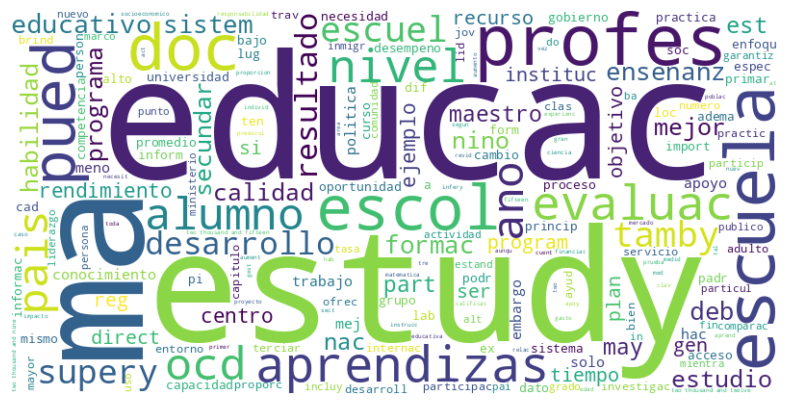

In [ ]:
# Generamos nube de palabras para ODS 4
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contador_palabras_ods_4)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

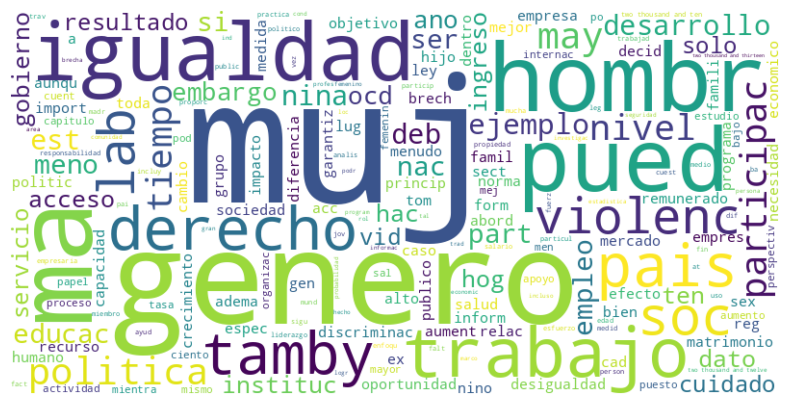

In [ ]:
# Generamos nube de palabras para ODS 5
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(contador_palabras_ods_5)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Convertimos la columna *words*, la cual contiene listas de elementos, en una sola cadea de texto donde los elementos de la lista estarán separados por espacion en blanco

In [ ]:
df['words'] = df['words'].apply(lambda x: ' '.join(map(str,x)))
df

,Textos_espanol,sdg,words
0,"Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas surtidas). Ambas cifras se encuentran entre las más altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3,ejemplo numero consulta externa especialista three hundred and nineteen cad mil derechohaby sp comparac three hundred and thirty-eight six hundred and twenty cad mil derechohaby imss issst respectiva si bien diferencia pued reflej necesidad desig poblac ligera may issst pued justificars maner numero receta pudieron ser surtida totalidad farmaceutico debido falt existencia thirty-three dentro sp comparac fourteen dentro imss segun dato encuest aunqu propia cifra instituto s sugy tasa ma alta receta surtida amba cifra encu ma alta ocd gasto bolsillo reducido significativa ultim decad pe esfuerzo logr cobertur sanitar univers trav reform sp
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3,two thousand and seven gobierno cent financio directa solo three gasto tot salud realizo transferencia especifica gasto salud ascendieron fifty-six gasto tot may part gasto presupuestario salud real gobierno condado condado pobr solo pued ofrec bajo nivel at poblac loc gobierno provint proporcion subsidio lado ofert hospit
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3,clara fact juego particul variedad barrera determin soc pued relacionado genero clas etn cast idiom relig surg estructura norma proceso soc arraigado aceiv incluso fom distribuc injusta riquez recurso soc ejemplo persona viv vih enfermedad cronica enfr alto nivel estigm discriminac dificult acceso prueba medica tratamiento at apoyo gobierno busc mejor estand sal

Guardamos el DataFrame en un archivo CSV

In [ ]:
new_df = df[['Textos_espanol', 'words', 'sdg']]
new_df.to_csv('./content/df_procesado.csv', index=False)

# 3. Modelado y evaluación

## 3.1 Random Forest - Germán Rojas

Random Forest es un algoritmo de aprendizaje supervisado que se utiliza tanto para la clasificación como para la regresión. Este algoritmo se basa en la combinación de múltiples árboles de decisión, donde cada árbol se entrena con una submuestra aleatoria del conjunto de datos de entrenamiento. Durante la predicción, el algoritmo promedia las predicciones de todos los árboles de decisión para obtener la salida final.

Random Forest se puede utilizar en la clasificación de un texto según los ODS porque es capaz de manejar múltiples características de texto (como BoW, TF-IDF y HashingVectorizer) al mismo tiempo, lo que puede mejorar el rendimiento en la clasificación. Además, al combinar múltiples árboles de decisión, Random Forest reduce el riesgo de sobreajuste y mejora la generalización del modelo a nuevos datos. En resumen, Random Forest puede ser útil para entrenar modelos de clasificación de texto según los ODS porque puede manejar múltiples características de texto, reduce el riesgo de sobreajuste y mejora la generalización del modelo a nuevos datos.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

### Separación de datos

In [ ]:
data = df.copy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data[['words']], data['sdg'], random_state=42, stratify=data['sdg'], test_size=0.2)

In [ ]:
X_train.shape, X_test.shape

((3228, 1), (808, 1))

In [ ]:
y_train.head()

,sdg
3595,5
2888,5
1035,4
4018,5
2478,5


Verificamos que se mantenga una proporción similar a la original

In [ ]:
pd.Series(y_train).value_counts(normalize=True)

,proportion
sdg,
5,0.358426
4,0.334882
3,0.306691


In [ ]:
pd.Series(y_test).value_counts(normalize=True)

,proportion
sdg,
5,0.357673
4,0.335396
3,0.306931


### Vectorización del texto

Usaremos el TfidfVectorizer para crear una matriz de términos de frecuencia inversa de documentos (TF-IDF) a partir del conjunto de datos de entrenamiento (X_train). La finalidad de utilizar TF-IDF es dar más peso a las palabras que son importantes para el documento, lo que ayuda a mejorar la calidad de las predicciones.

In [ ]:
texts = X_train['words']

tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,
                                   stop_words=stop_words,
                                   lowercase=True)

X_tfidf = tfidf_vectorizer.fit_transform(texts)
X_tfidf.shape

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


(3228, 13209)

In [ ]:
print(f'Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}')

Vocabulary size: 13209


In [ ]:
tfidf_model_best = RandomForestClassifier(random_state=7)

print("Shape de X_tfidf:", X_tfidf.shape)
print("Shape de y_train:", y_train.shape)
print("Shape de y_test:", y_test.shape)
print("Ejemplos de y_train:", y_train.head(10))  # Imprime las primeras 10 etiquetas
print("Ejemplos de y_test:", y_test.head(10))    # Imprime las primeras 10 etiquetas

Shape de X_tfidf: (3228, 13209)
Shape de y_train: (3228,)
Shape de y_test: (808,)
Ejemplos de y_train: 3595    5
2888    5
1035    4
4018    5
2478    5
3228    3
2678    5
653     3
837     3
1000    4
Name: sdg, dtype: int64
Ejemplos de y_test: 1471    4
1782    4
564     3
3497    4
1594    4
3573    5
2066    5
1364    4
3395    3
798     3
Name: sdg, dtype: int64


In [ ]:
tfidf_model_best.fit(X_tfidf, y_train)

RandomForestClassifier(random_state=7)

Mostramos un gráfico de barras horizontal para mostrar la importancia de cada característica en la predicción del modelo.

<Axes: >

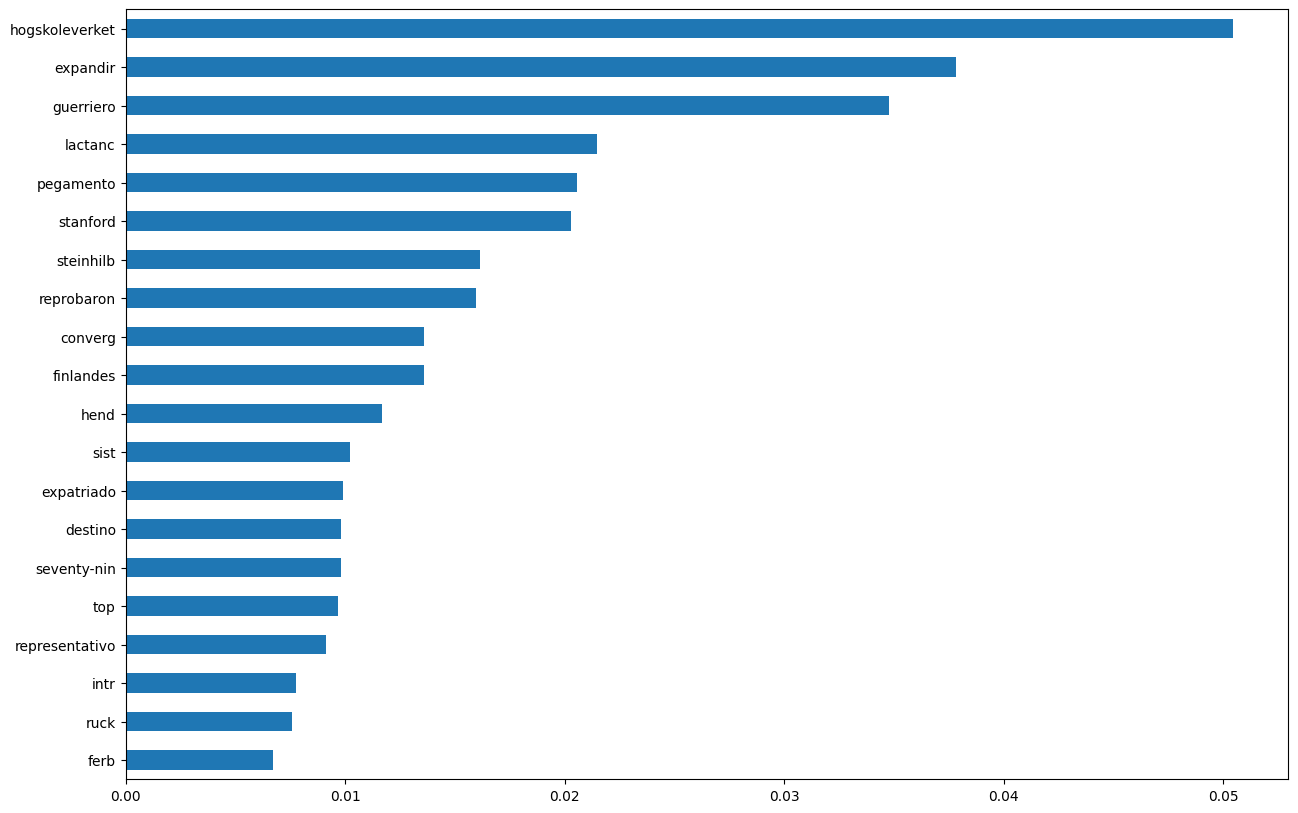

In [ ]:
pd.Series(tfidf_model_best.feature_importances_, index=tfidf_vectorizer.vocabulary_).sort_values().tail(20).plot.barh(figsize=(15, 10))

Se muestra la cantidad de árboles en el modelo y la profundidad promedio de los árboles en el modelo. Finalmente, se hace una predicción en los datos de entrenamiento y en los datos de prueba. El propósito de esto es evaluar el rendimiento del modelo y su capacidad para generalizar en datos nuevos.

In [ ]:
tfidf_estimators = tfidf_model_best.estimators_
print("Number of trees:", len(tfidf_estimators))
print("Trees depth (mean):", np.mean([tree.get_depth() for tree in tfidf_estimators]))

Number of trees: 100
Trees depth (mean): 97.4


In [ ]:
# predicciones en función de las características de entrenamiento vectorizadas
y_train_tfidf_predict = tfidf_model_best.predict(X_tfidf)
# predicciones en función de las características de prueba vectorizadas en X_test["words"]
y_test_tfidf_predict = tfidf_model_best.predict(tfidf_vectorizer.transform(X_test["words"]))

### Evaluación cuantitativa

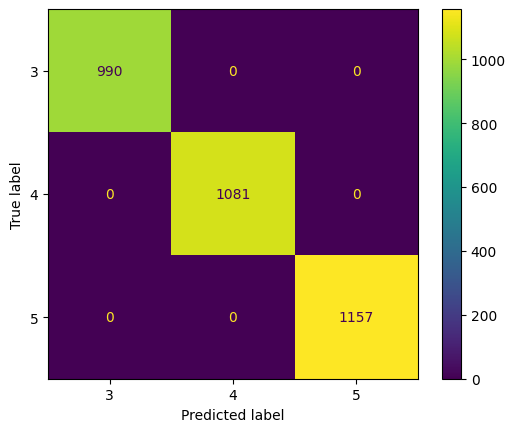

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_train, y_train_tfidf_predict)

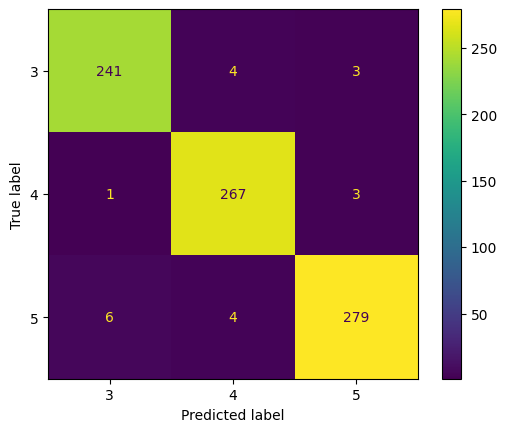

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_tfidf_predict)

### Métricas DataFrame de entrenamiento

Estos resultados indican que el modelo de clasificación de Random Forest basado en TF-IDF logró clasificar correctamente todos los casos en el conjunto de entrenamiento. La precisión, recall y F1-score son todas iguales a 1. Esto implica que el modelo es muy preciso en predecir la clase correcta y no hay falsos positivos ni falsos negativos.

In [ ]:
print("Precision (micro):", precision_score(y_train, y_train_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_train, y_train_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_train, y_train_tfidf_predict, average='micro'))

Precision (micro): 1.0
Recall (micro): 1.0
F1 (micro): 1.0


In [ ]:
print("Precision (macro):", precision_score(y_train, y_train_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_train, y_train_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_train, y_train_tfidf_predict, average='macro'))

Precision (macro): 1.0
Recall (macro): 1.0
F1 (macro): 1.0


In [ ]:
print("Precision (weighted):", precision_score(y_train, y_train_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_train, y_train_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_train, y_train_tfidf_predict, average='weighted'))

Precision (weighted): 1.0
Recall (weighted): 1.0
F1 (weighted): 1.0


### Métricas DataFrame de prueba

Estos resultados corresponden a la evaluación del modelo de clasificación basado en TF-IDF en el conjunto de prueba. La precisión, recall y F1-score obtenidos son 0.98, 0.98 y 0.98, respectivamente. La precisión indica la proporción de verdaderos positivos entre los ejemplos clasificados como positivos, mientras que el recall mide la proporción de verdaderos positivos que han sido correctamente identificados por el modelo. El F1-score es una medida que combina la precisión y el recall para obtener una medida general de la calidad de la clasificación.

En este caso, los resultados indican que el modelo tiene una buena precisión y recall, lo que sugiere que es capaz de identificar correctamente la mayoría de los textos según ODS en el conjunto de prueba.

In [ ]:
print("Precision (micro):", precision_score(y_test, y_test_tfidf_predict, average='micro'))
print("Recall (micro):", recall_score(y_test, y_test_tfidf_predict, average='micro'))
print("F1 (micro):", f1_score(y_test, y_test_tfidf_predict, average='micro'))

Precision (micro): 0.974009900990099
Recall (micro): 0.974009900990099
F1 (micro): 0.974009900990099


In [ ]:
print("Precision (macro):", precision_score(y_test, y_test_tfidf_predict, average='macro'))
print("Recall (macro):", recall_score(y_test, y_test_tfidf_predict, average='macro'))
print("F1 (macro):", f1_score(y_test, y_test_tfidf_predict, average='macro'))

Precision (macro): 0.9738768842928436
Recall (macro): 0.9741373232741145
F1 (macro): 0.9739738690368117


In [ ]:
print("Precision (weighted):", precision_score(y_test, y_test_tfidf_predict, average='weighted'))
print("Recall (weighted):", recall_score(y_test, y_test_tfidf_predict, average='weighted'))
print("F1 (weighted):", f1_score(y_test, y_test_tfidf_predict, average='weighted'))

Precision (weighted): 0.9740496944431285
Recall (weighted): 0.974009900990099
F1 (weighted): 0.9739953055879161


In [ ]:
print(classification_report(y_test, y_test_tfidf_predict))

              precision    recall  f1-score   support

           3       0.97      0.97      0.97       248
           4       0.97      0.99      0.98       271
           5       0.98      0.97      0.97       289

    accuracy                           0.97       808
   macro avg       0.97      0.97      0.97       808
weighted avg       0.97      0.97      0.97       808



### Validación cruzada

El valor obtenido en la validación cruzada de 0.969 indica que el modelo de clasificación de texto usando TF-IDF como representación de características tiene un buen desempeño en términos de la precisión general en la predicción de las clases.

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Validación cruzada con 5 iteraciones
cv_scores = cross_val_score(tfidf_model_best, X_tfidf, y_train, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.96594427 0.97368421 0.96594427 0.96744186 0.98449612]
Mean cross-validation score: 0.9715021479828161


## 3.2 SVM - Juan Diego Sarmiento Sánchez


Una Suport Vector Machine (SVM) es un modelo de aprendizaje basado en funciones lineales automático capaz de realizar clasificación, regresión y detección de novedades lineales o no lineales. Las SVM destacan con conjuntos de datos no lineales de tamaño pequeño y mediano (es decir, de cientos a miles de instancias), especialmente para tareas de clasificación.

In [ ]:
X = df['words']
y = df['sdg']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
#Creamos una pipelinea para vectorización y para la SVM
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('svm', SVC())
])

In [ ]:

# Se define los hiperparámetros a ajustar

param_grid = {
    'tfidf__max_features': [1000, 2000],    # Número máximo de características en TF-IDF
    'svm__C': [0.1, 1, 10, 100],      #Regularización de SVM
    'svm__kernel': ['linear', 'rbf'],     #Kernel lineal o RBF
    'svm__gamma': ['scale', 'auto']       # Parámetro gamma (para RBF)
}
# Búsqueda de los mejores hiperparámetros con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Entrenamos el modelo con los hiperparámetros
grid_search.fit(X_train, y_train)

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}


Vemos los resultados de todos los parámetros:

In [ ]:
pd.DataFrame(grid_search.cv_results_).sort_values(by='mean_test_score', ascending=False)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm__C,param_svm__gamma,param_svm__kernel,param_tfidf__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
19,4.875469,1.048792,0.805936,0.172054,10,scale,rbf,2000,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}",0.980531,0.971681,0.984071,0.980531,0.994690,0.982301,0.007425,1
27,5.221005,1.407922,0.796418,0.173720,100,scale,rbf,2000,"{'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}",0.980531,0.971681,0.984071,0.980531,0.994690,0.982301,0.007425,1
11,4.340229,0.694180,0.773015,0.154861,1,scale,rbf,2000,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 2000}",0.982301,0.969912,0.982301,0.978761,0.992920,0.981239,0.007391,3
9,2.406279,0.420507,0.436793,0.112145,1,scale,linear,2000,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'linear', 'tfidf__max_features': 2000}",0.978761,0.968142,0.975221,0.980531,0.994690,0.979469,0.008714,4
13,2.324717,0.538785,0.452598,0.102965,1,auto,linear,2000,"{'svm__C': 1, 'svm__gamma': 'auto', 'svm__kernel': 'linear', 'tfidf__max_features': 2000}",0.978761,0.968142,0.975221,0.980531,0.994690,0.979469,0.008714,4
10,2.922171,0.592407,0.703152,0.199479,1,scale,rbf,1000,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 1000}",0.976991,0.968142,0.978761,0.976991,0.991150,0.978407,0.007374,6
18,4.523033,1.449240,0.682663,0.154986,10,scale,rbf,1000,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 1000}",0.976991,0.971681,0.973451,0.976991,0.989381,0.977699,0.006192,7
26,3.945465,0.895175,0.567510,0.008991,100,scale,rbf,1000,"{'svm__C': 100, 'svm__gamma': 'scale', 'svm__kernel': 'rbf', 'tfidf__max_features': 1000}",0.976991,0.971681,0.973451,0.976991,0.989381,0.977699,0.006192,7
21,2.432483,0.942780,0.633712,0.275827,10,auto,linear,2000,"{'svm__C': 10, 'svm__gamma': 'auto', 'svm__kernel': 'linear', 'tfidf__max_features': 2000}",0.971681,0.968142,0.971681,0.980531,0.989381,0.976283,0.007723,9
17,2.620847,1.164529,0.484970,0.256517,10,scale,linear,2000,"{'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'linear', 'tfidf__max_features': 2000}",0.971681,0.968142,0.971681,0.980531,0.989381,0.976283,0.007723,9


In [ ]:
#Estimamos con el modelo ya cargado
y_pred = grid_search.best_estimator_.predict(X_test)


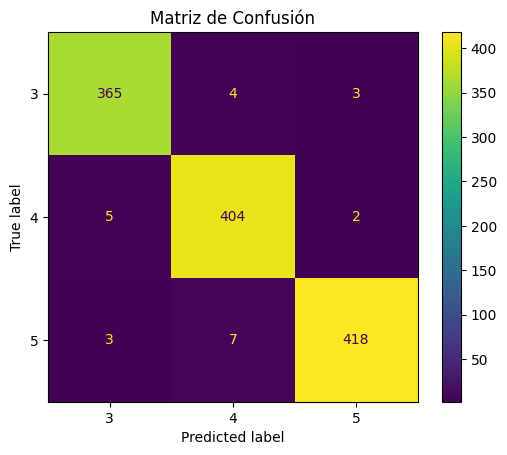

In [ ]:
#Vemos la matriz de confución sin normalizar
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=grid_search.best_estimator_.classes_
)

disp.ax_.set_title('Matriz de Confusión')
plt.show()

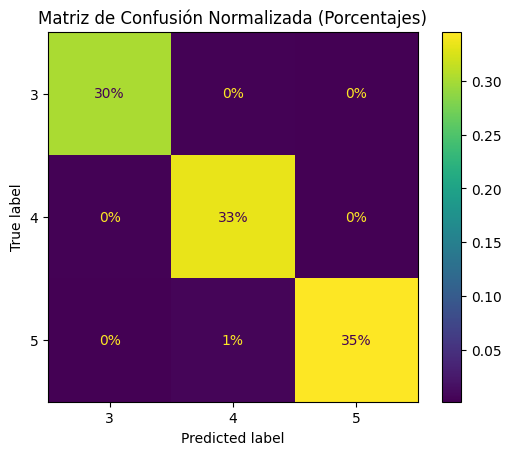

In [ ]:
#Vemos la matriz de confución normalizada
disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    normalize='all',
    values_format=".0%",
    display_labels=grid_search.best_estimator_.classes_
)

disp.ax_.set_title('Matriz de Confusión Normalizada (Porcentajes)')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           3       0.98      0.98      0.98       372
           4       0.97      0.98      0.98       411
           5       0.99      0.98      0.98       428

    accuracy                           0.98      1211
   macro avg       0.98      0.98      0.98      1211
weighted avg       0.98      0.98      0.98      1211



## 3.3. KNN - María Alméciga

### Separación de las características y la etiqueta

Aquí se separan las características (X) y la etiqueta (y) del conjunto de datos.

In [162]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import csr_matrix, hstack
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

data3 = df.copy()

# Separar las características y la etiqueta
X = data3.drop('sdg', axis=1)
y = data3['sdg']

### Vectorización del texto

El texto es transformado en una matriz numérica utilizando TfidfVectorizer, lo que convierte los textos en vectores de características. Esta técnica asigna un peso mayor a las palabras más relevantes. Esto se realiza con el objetivo de transformar el texto en una representación numérica qie se pueda usar en modelos de aprendizaje automático. También se manejan errores con datos NaN.

In [163]:
# Vectorización de texto
tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,
                                   stop_words=stopwords.words('spanish'),
                                   lowercase=True)
X_text = tfidf_vectorizer.fit_transform(X['Textos_espanol'])

X_num = X.drop(['Textos_espanol'], axis=1)
X_num = X_num.apply(pd.to_numeric, errors='coerce')
imputer = SimpleImputer(strategy='mean')
X_num_imputed = imputer.fit_transform(X_num)
X_num_imputed_csr = csr_matrix(X_num_imputed)
X_combined = hstack([X_text, X_num_imputed_csr])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/impute/_base.py:558: UserWarning: Skipping features without any observed values: ['words']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


### Entrenamiento del modelo

Se dividen los datos en conjuntos de entrenamiento y prueba para evaluar el rendimiento del modelo. Se crea una instancia del clasificador con 3, 5 y 7 vecinos y se evalúa utilizando validación cruzada para obtener una medida del rendimiento general del modelo en datos no vistos.

In [164]:
# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Crear modelo KNN
knn3 = KNeighborsClassifier(n_neighbors=3)

# Evaluar con validacion cruzada
try:
    scores = cross_val_score(knn3, X_combined, y, cv=5)
    print("Cross-validation scores:", scores)
except ValueError as e:
    print("Error en cross-validation:", e)

# Crear modelo KNN
knn5 = KNeighborsClassifier(n_neighbors=5)

# Evaluar con validacion cruzada
try:
    scores = cross_val_score(knn5, X_combined, y, cv=5)
    print("Cross-validation scores:", scores)
except ValueError as e:
    print("Error en cross-validation:", e)

# Crear modelo KNN
knn7 = KNeighborsClassifier(n_neighbors=5)

# Evaluar con validacion cruzada
try:
    scores = cross_val_score(knn7, X_combined, y, cv=5)
    print("Cross-validation scores:", scores)
except ValueError as e:
    print("Error en cross-validation:", e)

Cross-validation scores: [0.94306931 0.92317224 0.9330855  0.92936803 0.92688971]
Cross-validation scores: [0.96039604 0.94795539 0.9417596  0.93928129 0.94052045]
Cross-validation scores: [0.96039604 0.94795539 0.9417596  0.93928129 0.94052045]


### Entrenamiento y evaluación del modelo

Se observa que la mejor opción parece ser usando 5 vecinos, al aumentar el rendimiento con respecto al clasificador con 3 vecinos. Se observa que al usar 7 vecinos, no sigue aumentando el rendimiento.

Por tanto, se elige el clasificador con 5 vecinos y se entrena el modelo. Se realiza adicionalmente la evaluación del mismo, encontrando buenos valores de `accuracy`, `precision`, `recall`, y `f1-score`.

In [165]:
# Entrenamiento del modelo
knn5.fit(X_train, y_train)

# Evaluacion del modelo
from sklearn.metrics import classification_report, accuracy_score
y_pred = knn5.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9405940594059405
Classification Report:
               precision    recall  f1-score   support

           3       0.93      0.97      0.95       242
           4       0.94      0.94      0.94       277
           5       0.95      0.92      0.94       289

    accuracy                           0.94       808
   macro avg       0.94      0.94      0.94       808
weighted avg       0.94      0.94      0.94       808



Se validan los datos con una matriz de confusión:

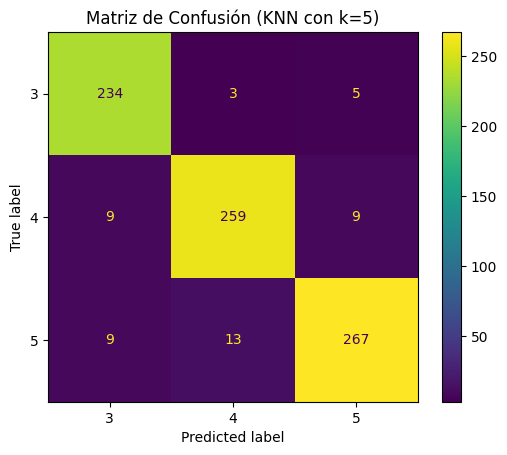

In [166]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_title('Matriz de Confusión (KNN con k=5)')
plt.show()

# Predicciones con datos de prueba

### Original

In [176]:
from sklearn.ensemble import RandomForestClassifier
data = df.copy()
X_train, X_test, y_train, y_test = train_test_split(data[['words']], data['sdg'], random_state=42, stratify=data['sdg'], test_size=0.2)
X_train.shape, X_test.shape
y_train.head()

pd.Series(y_train).value_counts(normalize=True)

pd.Series(y_test).value_counts(normalize=True)

texts = X_train['words']

tfidf_vectorizer = TfidfVectorizer(tokenizer=word_tokenize,
                                   stop_words=stop_words,
                                   lowercase=True)

X_tfidf = tfidf_vectorizer.fit_transform(texts)
X_tfidf.shape

print(f'Vocabulary size: {len(tfidf_vectorizer.vocabulary_)}')
tfidf_model_best = RandomForestClassifier(random_state=7)

tfidf_model_best.fit(X_tfidf, y_train)

tfidf_estimators = tfidf_model_best.estimators_

y_train_tfidf_predict = tfidf_model_best.predict(X_tfidf)
y_test_tfidf_predict = tfidf_model_best.predict(tfidf_vectorizer.transform(X_test["words"]))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocabulary size: 13209


### Predicciones

In [177]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

data_new = pd.read_excel('./content/TestODScat_345.xlsx')

In [179]:
stop_words = stopwords.words('spanish')

X_new_texts = data_new['Textos_espanol']

X_new_tfidf = tfidf_vectorizer.transform(X_new_texts)

tfidf_model_best = RandomForestClassifier(random_state=7)
tfidf_model_best.fit(X_tfidf, y_train)

y_new_pred = tfidf_model_best.predict(X_new_tfidf)

data_new['sdg'] = y_new_pred

output_file = 'labeled_data.csv'
data_new.to_csv(output_file, index=False)